# Základy práce s Python v Google API - Vision
Python lze použít jako základní scriptovací jazyk, nebo jako silný programovací jazyk s objekty a vlasními knohovnami. V tomto cvičení budeme využívat ukázek spouštěšní scriptů v prostředí jupyter, které umožňuje interaktivní práci s jazykem Python. Detaily na (https://jupyter.org/).

Příkazy se zpracovávají jeden po druhém, symbol ukončení je konec řádku, vnitřní blok se odděluje tabulátorem

# Google API a instalace knihoven
Klíčové knihovny, které budeme používat pro práci s google api jsou k dispozici v rámci instalačních balíků pomocí pip (https://pip.pypa.io/en/stable/) nebo přes nástroj Anaconda (https://www.anaconda.com/) (již máte nainsotalované na vašich virtuálních strojích). Konkrétní knihovny, které budeme potřebovat jsou nálsedující:
- `google-cloud-language` pro analýzu jazyka
- `google-cloud-vision` pro analýzu pbrazu
- `google-cloud` zastřešující balík, pokud nechcete načítat jednotlivé balíky 
- `google-oauth` pro zajištění snadné autentizace

Je důležité vědět, jak si potřebné knihovny do Python nainstalovat. K tomu slouží příkaz

```pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth matplotlib ipython```,

který spusťte v příkazové řádce (Windows => Start => Command prompt)

Základem jazyka Python je práce s knihovnami a kontrola, že vše je správně nainstalované. Načtení knihovan a ověření provedeme pomocí následujícího příkazu:

In [1]:
from google.cloud import vision
from google.oauth2 import service_account

V případě, že se vám povedlo předchozí příkazy spustit bez chybových hlášek, je vše korektně nainstalováno a je možné začít pracovat s Google API. Než k tomu přistoupíme, bude potřeba ještě nahrát knihovny pro práci s obrázky

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

Dalším kontrolním bodem je schopnost přihlásit se k vašemu účtu z Python, k tomu slouží následující příkazy. Je potřeba začít s tím, aby jste již vygenerovaný soubor s přihlašovacími údaji zpřístupnili pythony:

In [3]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [4]:
client = vision.ImageAnnotatorClient(credentials=creds)

Začneme jednoduchým testem funkčnosti API na jednom obrázku, odkaz na název dejme do proměnné:

In [5]:
soubor = './data/tym16/110000.jpg'

Načteme obrázek ze souboru:

In [6]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

Předáme obrázek do Google knihovny ```vision```:

In [7]:
image = vision.Image(content = content)

Nyní můžeme odeslat obrázek ke zpracování pomocí Google API a získat popis obrázku pomocí funkce ```label_detection```. Detail k funkci najdete na následujících stránkách (https://googleapis.dev/python/vision/latest/vision_v1/services.html).

In [8]:
response = client.label_detection(image = image)

Výstup je k dispozici v pomocí funkce ```label_annotations```

In [9]:
labels = response.label_annotations

In [10]:
print(labels)

[mid: "/m/0838f"
description: "Water"
score: 0.9618131
topicality: 0.9618131
, mid: "/m/0dx1j"
description: "Town"
score: 0.94295615
topicality: 0.94295615
, mid: "/m/0cgh4"
description: "Building"
score: 0.9355185
topicality: 0.9355185
, mid: "/m/03jm5"
description: "House"
score: 0.88523763
topicality: 0.88523763
, mid: "/m/05t0z3q"
description: "Bank"
score: 0.8767913
topicality: 0.8767913
, mid: "/m/04h4w"
description: "Lake"
score: 0.8206339
topicality: 0.8206339
, mid: "/m/03h5wy"
description: "Channel"
score: 0.8195773
topicality: 0.8195773
, mid: "/m/0csh5"
description: "Cumulus"
score: 0.77680254
topicality: 0.77680254
, mid: "/m/06hyd"
description: "Roof"
score: 0.76950437
topicality: 0.76950437
, mid: "/m/040h04"
description: "Hill station"
score: 0.75565475
topicality: 0.75565475
]


Než si projdeme popisky obrázku vrácené funkcí Google API, podívejme se na obrázek.

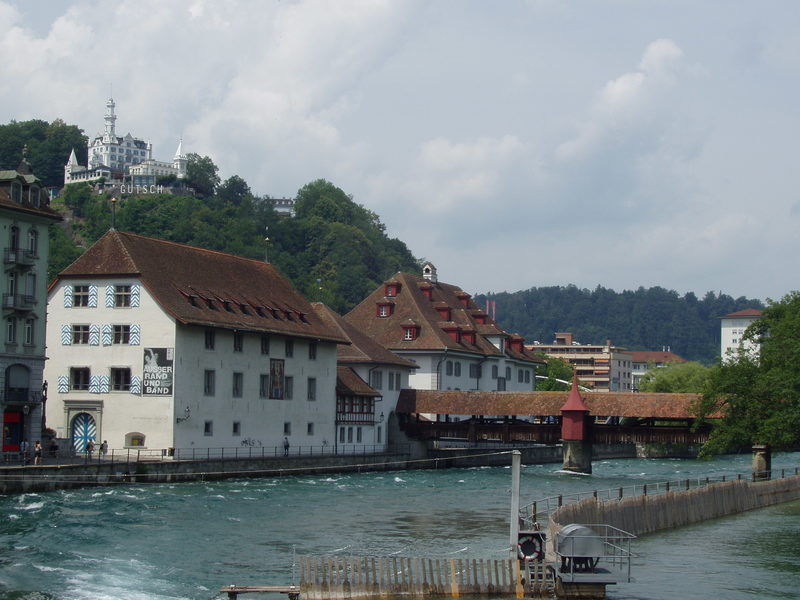

In [11]:
Image(soubor)

Nyní se podívejme, jaké ```Labels``` nám Google API vrátil:

In [12]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Water
Town
Building
House
Bank
Lake
Channel
Cumulus
Roof
Hill station


# Nyní trocha automatizace
projdeme všechny soubory v adresáři a provedeme analýzu na nich:

In [13]:
import os

In [14]:
path = './data/tym16'

In [84]:
type(labels)

proto.marshal.collections.repeated.RepeatedComposite

In [138]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    
    #for label in labels:
    #    if label.score < 0.95:
    #        labels.remove(label)

    return labels

In [139]:
print(labels.count(0))

0


In [140]:
labels_images = {}

In [141]:
directories = os.listdir(path)

In [142]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [143]:
print(labels_images)

{'./data/tym16\\100000.jpg': ['Vegetation', 'Nature', 'Mountainous landforms', 'Highland', 'Terrain', 'Mountain', 'Ecoregion', 'Atmospheric phenomenon', 'Hill station', 'Nature reserve'], './data/tym16\\100701.jpg': ['Blue', 'Lighting', 'Night', 'Electricity', 'Christmas decoration', 'Majorelle blue', 'Darkness', 'Landmark', 'Light', 'Electric blue'], './data/tym16\\100901.jpg': ['Daytime', 'Sky', 'Atmosphere', 'Sunlight', 'Light', 'Tints and shades', 'World', 'Morning', 'Cumulus', 'Heat'], './data/tym16\\102500.jpg': ['Vegetation', 'Natural environment', 'Plant community', 'Nature reserve', 'Bridge', 'Forest', 'Ecoregion', 'Terrestrial plant', 'Old-growth forest', 'Jungle'], './data/tym16\\102600.jpg': ['Vegetation', 'Natural environment', 'Branch', 'Plant community', 'Nature reserve', 'Forest', 'Trail', 'Terrestrial plant', 'Biome', 'Shrub'], './data/tym16\\103001.jpg': ['Dome', 'Architecture', 'Landmark', 'Finial', 'Holy places', 'Dome', 'Place of worship', 'Stupa', 'Byzantine archi

In [144]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [145]:
print(tags)

{'Vegetation': [3, ['./data/tym16\\100000.jpg', './data/tym16\\102500.jpg', './data/tym16\\102600.jpg']], 'Nature': [1, ['./data/tym16\\100000.jpg']], 'Mountainous landforms': [3, ['./data/tym16\\100000.jpg', './data/tym16\\112301.jpg', './data/tym16\\117300.jpg']], 'Highland': [3, ['./data/tym16\\100000.jpg', './data/tym16\\112301.jpg', './data/tym16\\117300.jpg']], 'Terrain': [1, ['./data/tym16\\100000.jpg']], 'Mountain': [3, ['./data/tym16\\100000.jpg', './data/tym16\\112301.jpg', './data/tym16\\117300.jpg']], 'Ecoregion': [2, ['./data/tym16\\100000.jpg', './data/tym16\\102500.jpg']], 'Atmospheric phenomenon': [1, ['./data/tym16\\100000.jpg']], 'Hill station': [2, ['./data/tym16\\100000.jpg', './data/tym16\\110000.jpg']], 'Nature reserve': [3, ['./data/tym16\\100000.jpg', './data/tym16\\102500.jpg', './data/tym16\\102600.jpg']], 'Blue': [1, ['./data/tym16\\100701.jpg']], 'Lighting': [1, ['./data/tym16\\100701.jpg']], 'Night': [1, ['./data/tym16\\100701.jpg']], 'Electricity': [1, ['.

In [146]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [147]:
print(sort_tabs[0])

('Building', [5, ['./data/tym16\\110000.jpg', './data/tym16\\110702.jpg', './data/tym16\\113900.jpg', './data/tym16\\114502.jpg', './data/tym16\\114504.jpg']])


In [148]:
print(sort_tabs)

[('Building', [5, ['./data/tym16\\110000.jpg', './data/tym16\\110702.jpg', './data/tym16\\113900.jpg', './data/tym16\\114502.jpg', './data/tym16\\114504.jpg']]), ('House', [4, ['./data/tym16\\110000.jpg', './data/tym16\\113900.jpg', './data/tym16\\114502.jpg', './data/tym16\\114504.jpg']]), ('Roof', [4, ['./data/tym16\\103001.jpg', './data/tym16\\110000.jpg', './data/tym16\\113900.jpg', './data/tym16\\114504.jpg']]), ('Facade', [3, ['./data/tym16\\110702.jpg', './data/tym16\\114502.jpg', './data/tym16\\114504.jpg']]), ('Town', [3, ['./data/tym16\\110000.jpg', './data/tym16\\113900.jpg', './data/tym16\\114502.jpg']]), ('Lake', [3, ['./data/tym16\\110000.jpg', './data/tym16\\110302.jpg', './data/tym16\\117402.jpg']]), ('Channel', [3, ['./data/tym16\\110000.jpg', './data/tym16\\110302.jpg', './data/tym16\\117402.jpg']]), ('Natural environment', [3, ['./data/tym16\\102500.jpg', './data/tym16\\102600.jpg', './data/tym16\\112301.jpg']]), ('Mountainous landforms', [3, ['./data/tym16\\100000.j

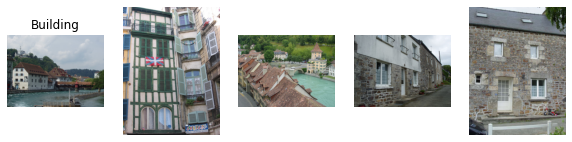

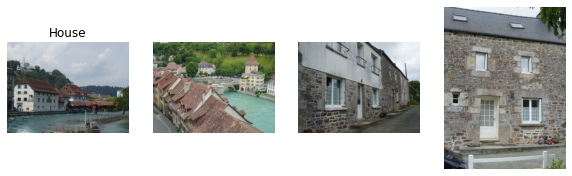

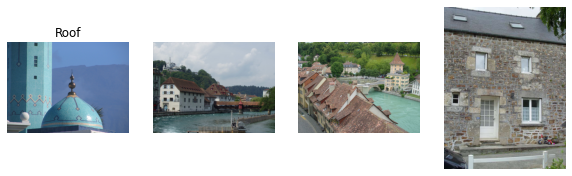

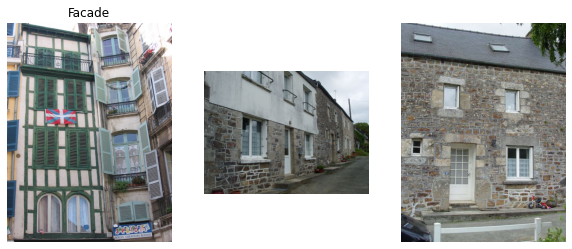

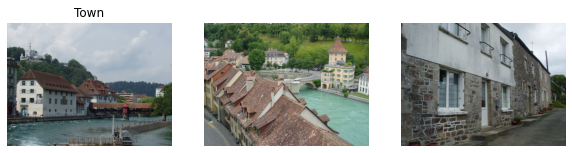

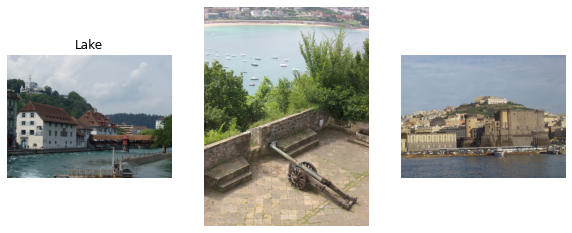

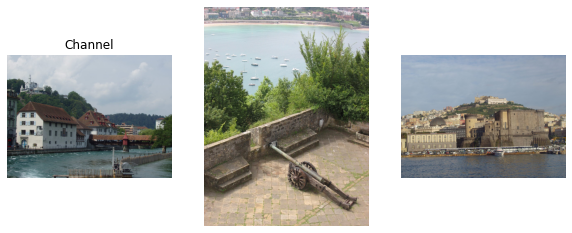

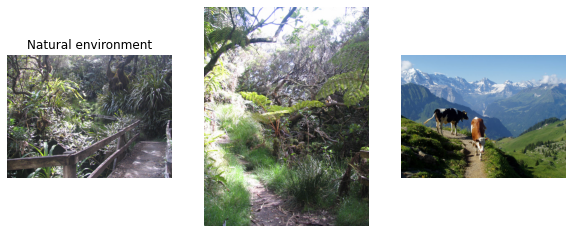

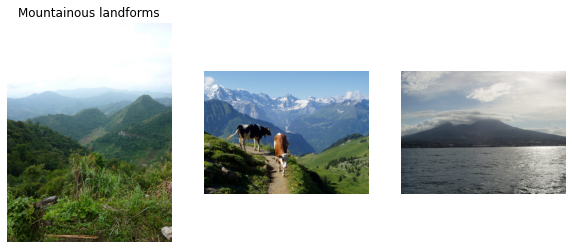

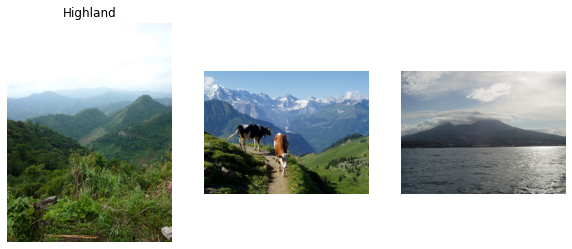

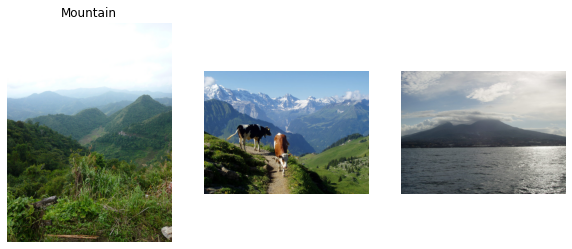

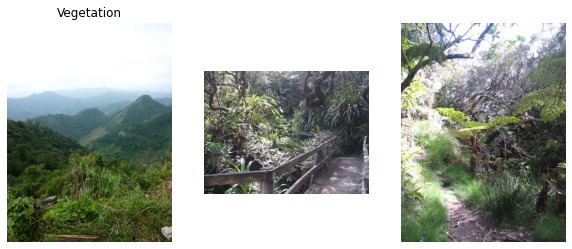

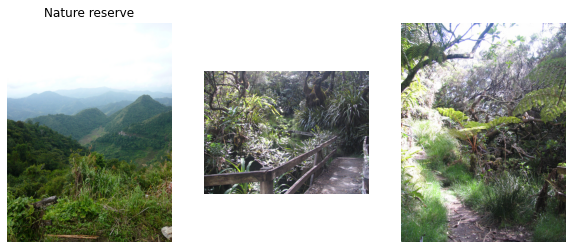

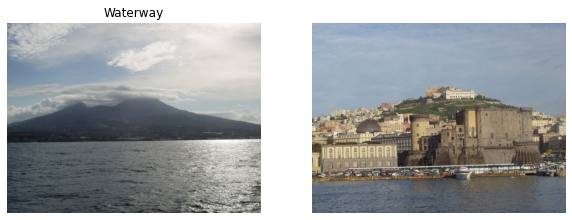

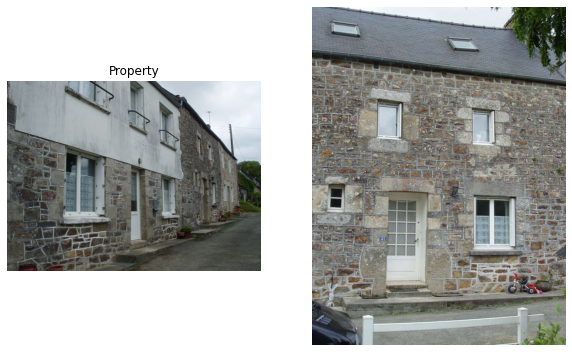

In [149]:
for k in range(15):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()